In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn

## data preprocessing

In [2]:
cd ..

C:\Users\kesav\OneDrive\Desktop\AI\dl\Long-term-traffic-flow-forecasting-using-a-hybrid-CNN-BiLSTM-model


In [3]:
df=pd.read_csv("Datasets/AS2(t-12).csv")
data=df["clave"]
df.drop(columns=["clave"],axis=1,inplace=True)
df['hour(t)']=list(np.arange(13,24))+list(np.arange(0,24))*1307
df=df.reindex(columns=['var1(t-12)','var2(t-12)','var3(t-12)','var4(t-12)','var5(t-12)','var6(t-12)','var7(t-12)','var8(t-12)','hour(t)','obj'])

print(df)
print(data)

       var1(t-12)  var2(t-12)  var3(t-12)  var4(t-12)  var5(t-12)  var6(t-12)  \
0             799      1442.0       658.0        76.0         0.0        36.0   
1             894       903.0       458.0        76.0         0.0        36.0   
2             760       397.0       190.0        76.0         0.0        36.0   
3             669       312.0       147.0        76.0         0.0        36.0   
4             665       299.0       124.0        76.0         0.0        36.0   
...           ...         ...         ...         ...         ...         ...   
31374         261       260.0       114.0       218.0         0.0       170.0   
31375         395       420.0       170.0       218.0         0.0       170.0   
31376         459       590.0       228.0       218.0         0.0       170.0   
31377         631       696.0       305.0       218.0         0.0       170.0   
31378         743       852.0       353.0       218.0         0.0       170.0   

       var7(t-12) var8(t-12

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['var8(t-12)']=le.fit_transform(df['var8(t-12)'])
# le.transform(df['var8(t-12)'])
print(df)

       var1(t-12)  var2(t-12)  var3(t-12)  var4(t-12)  var5(t-12)  var6(t-12)  \
0             799      1442.0       658.0        76.0         0.0        36.0   
1             894       903.0       458.0        76.0         0.0        36.0   
2             760       397.0       190.0        76.0         0.0        36.0   
3             669       312.0       147.0        76.0         0.0        36.0   
4             665       299.0       124.0        76.0         0.0        36.0   
...           ...         ...         ...         ...         ...         ...   
31374         261       260.0       114.0       218.0         0.0       170.0   
31375         395       420.0       170.0       218.0         0.0       170.0   
31376         459       590.0       228.0       218.0         0.0       170.0   
31377         631       696.0       305.0       218.0         0.0       170.0   
31378         743       852.0       353.0       218.0         0.0       170.0   

       var7(t-12)  var8(t-1

In [5]:
def slicing_data(data,rows):
    x=list()
    y=list()
    for i in np.arange(rows-1,len(data)):
        y.append(data.iloc[i][-1])
        x.append([data.iloc[i-3][:-1],data.iloc[i-2][:-1],data.iloc[i-1][:-1],data.iloc[i][:-1]])
    
    return np.array(x).astype('float32'),np.array(y).astype('float32')


In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import  train_test_split


In [7]:

scaler=MinMaxScaler()
df[df.columns.difference(['obj'])]=scaler.fit_transform(df[df.columns.difference(['obj'])])

In [8]:
x,y=slicing_data(df,4)
print(x)
print(y)

[[[0.08009199 0.33433804 0.22783934 ... 0.27970296 0.33333334 0.5652174 ]
  [0.08959104 0.20936704 0.15858726 ... 0.27970296 0.33333334 0.6086956 ]
  [0.07619238 0.0920473  0.06578948 ... 0.27970296 0.33333334 0.65217394]
  [0.06709329 0.07233944 0.05090028 ... 0.27970296 0.33333334 0.6956522 ]]

 [[0.08959104 0.20936704 0.15858726 ... 0.27970296 0.33333334 0.6086956 ]
  [0.07619238 0.0920473  0.06578948 ... 0.27970296 0.33333334 0.65217394]
  [0.06709329 0.07233944 0.05090028 ... 0.27970296 0.33333334 0.6956522 ]
  [0.06669333 0.0693253  0.04293629 ... 0.27970296 0.33333334 0.73913044]]

 [[0.07619238 0.0920473  0.06578948 ... 0.27970296 0.33333334 0.65217394]
  [0.06709329 0.07233944 0.05090028 ... 0.27970296 0.33333334 0.6956522 ]
  [0.06669333 0.0693253  0.04293629 ... 0.27970296 0.33333334 0.73913044]
  [0.05339466 0.0839323  0.04466759 ... 0.27970296 0.33333334 0.7826087 ]]

 ...

 [[0.02489751 0.03825643 0.02285319 ... 0.64851487 1.         0.7826087 ]
  [0.02629737 0.06028287 0

In [9]:
print(x[0].shape)
print(y.shape)

(4, 9)
(31376,)


In [10]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.333,random_state=101)

In [11]:
 y_test.shape

(10449,)

# model training

In [12]:
import tensorflow.keras.layers as layers

In [13]:
input_layer=layers.Input(shape=(4,9,1))
layer_1=layers.TimeDistributed(layers.Flatten())(input_layer)
layer_2=layers.Dropout(0.5)(layer_1)
layer_3=layers.LSTM(512, activation = 'relu')(layer_2)
layer_4=layers.BatchNormalization()(layer_3)
output_layer=layers.Dense(1)(layer_4)
model_1=tf.keras.Model(inputs=input_layer,outputs=output_layer)


In [14]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 9, 1)]         0         
                                                                 
 time_distributed (TimeDist  (None, 4, 9)              0         
 ributed)                                                        
                                                                 
 dropout (Dropout)           (None, 4, 9)              0         
                                                                 
 lstm (LSTM)                 (None, 512)               1069056   
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 1)                 513   

In [15]:
model_1.compile(optimizer='adam',loss='mse',metrics=[tf.keras.metrics.MeanAbsoluteError()])
history_1=model_1.fit(X_train,y_train,epochs=100,batch_size = 32, shuffle=True,validation_data=(X_test,y_test))

Epoch 1/100
654/654 [==============================] - 32s 46ms/step - loss: 204338.1094 - mean_absolute_error: 349.7538 - val_loss: 119294.2969 - val_mean_absolute_error: 296.7681
Epoch 2/100
654/654 [==============================] - 28s 43ms/step - loss: 74041.8906 - mean_absolute_error: 203.0550 - val_loss: 201436.5000 - val_mean_absolute_error: 369.6804
Epoch 3/100
654/654 [==============================] - 31s 47ms/step - loss: 64744.1406 - mean_absolute_error: 187.2376 - val_loss: 189314.8125 - val_mean_absolute_error: 346.6714
Epoch 4/100
654/654 [==============================] - 30s 47ms/step - loss: 59889.3555 - mean_absolute_error: 178.6700 - val_loss: 208891.6562 - val_mean_absolute_error: 366.8798
Epoch 5/100
654/654 [==============================] - 32s 49ms/step - loss: 57159.9961 - mean_absolute_error: 172.6806 - val_loss: 212190.9219 - val_mean_absolute_error: 381.3835
Epoch 6/100
654/654 [==============================] - 30s 46ms/step - loss: 55702.8320 - mean_abso

# model evaluation

In [16]:
model_1.save('model_12.h5')

C:\Users\kesav\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
from tensorflow.keras.models import load_model

In [18]:
savedModel=load_model('model_12.h5')
savedModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 9, 1)]         0         
                                                                 
 time_distributed (TimeDist  (None, 4, 9)              0         
 ributed)                                                        
                                                                 
 dropout (Dropout)           (None, 4, 9)              0         
                                                                 
 lstm (LSTM)                 (None, 512)               1069056   
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 1)                 513   

In [19]:
pred=savedModel.predict(X_test)
pred

327/327 [==============================] - 4s 12ms/step


array([[  -1.567928 ],
       [  -1.4802891],
       [-103.19333  ],
       ...,
       [ 510.75854  ],
       [  45.430614 ],
       [ -57.47057  ]], dtype=float32)

In [20]:
pred=pred.reshape(pred.shape[0])
y_test=y_test.reshape(y_test.shape[0])

In [21]:
MAE = sklearn.metrics.mean_absolute_error(pred,y_test)
print(MAE)

406.18384


In [22]:
import random

In [23]:

rand=random.randint(0,30000)
rand

25360

In [24]:
y1=y[rand:rand+500]
x1=savedModel.predict(x[rand:rand+500])


16/16 [==============================] - 0s 12ms/step


In [25]:
x1=x1.reshape(x1.shape[0])
x1

array([ 2.92270508e+02,  2.01580292e+02,  2.07300003e+02,  1.86513168e+02,
       -2.30471077e+01, -1.00305161e+02, -1.18762466e+02, -1.18533447e+02,
       -6.64900513e+01,  5.53989525e+01,  2.25715927e+02,  1.63422287e+02,
        1.94829025e+02,  4.19088013e+02,  4.24504913e+02,  3.93711853e+02,
        1.91507614e+02, -6.71550064e+01,  3.30318184e+01, -4.39868879e+00,
       -4.77858114e+00,  2.57156038e+00,  2.30029926e+01,  9.76632996e+01,
        1.48475037e+02,  1.96409866e+02,  2.44559326e+02,  1.27324829e+02,
       -4.19776573e+01, -9.62645721e+01, -1.24260269e+02, -1.04645798e+02,
       -4.43299065e+01,  1.27675283e+00,  7.41045990e+01,  7.10868225e+01,
        1.86564743e+02,  4.24366943e+02,  4.49637451e+02,  3.96702240e+02,
        2.06675995e+02, -4.82178459e+01,  4.32183189e+01, -2.58872747e+00,
       -4.30381155e+00,  2.36608753e+01,  3.67420883e+01,  1.34945892e+02,
        1.94653549e+02,  2.06524384e+02,  2.78733826e+02,  1.63263855e+02,
       -3.03400002e+01, -

In [26]:
import matplotlib.pylab as plt

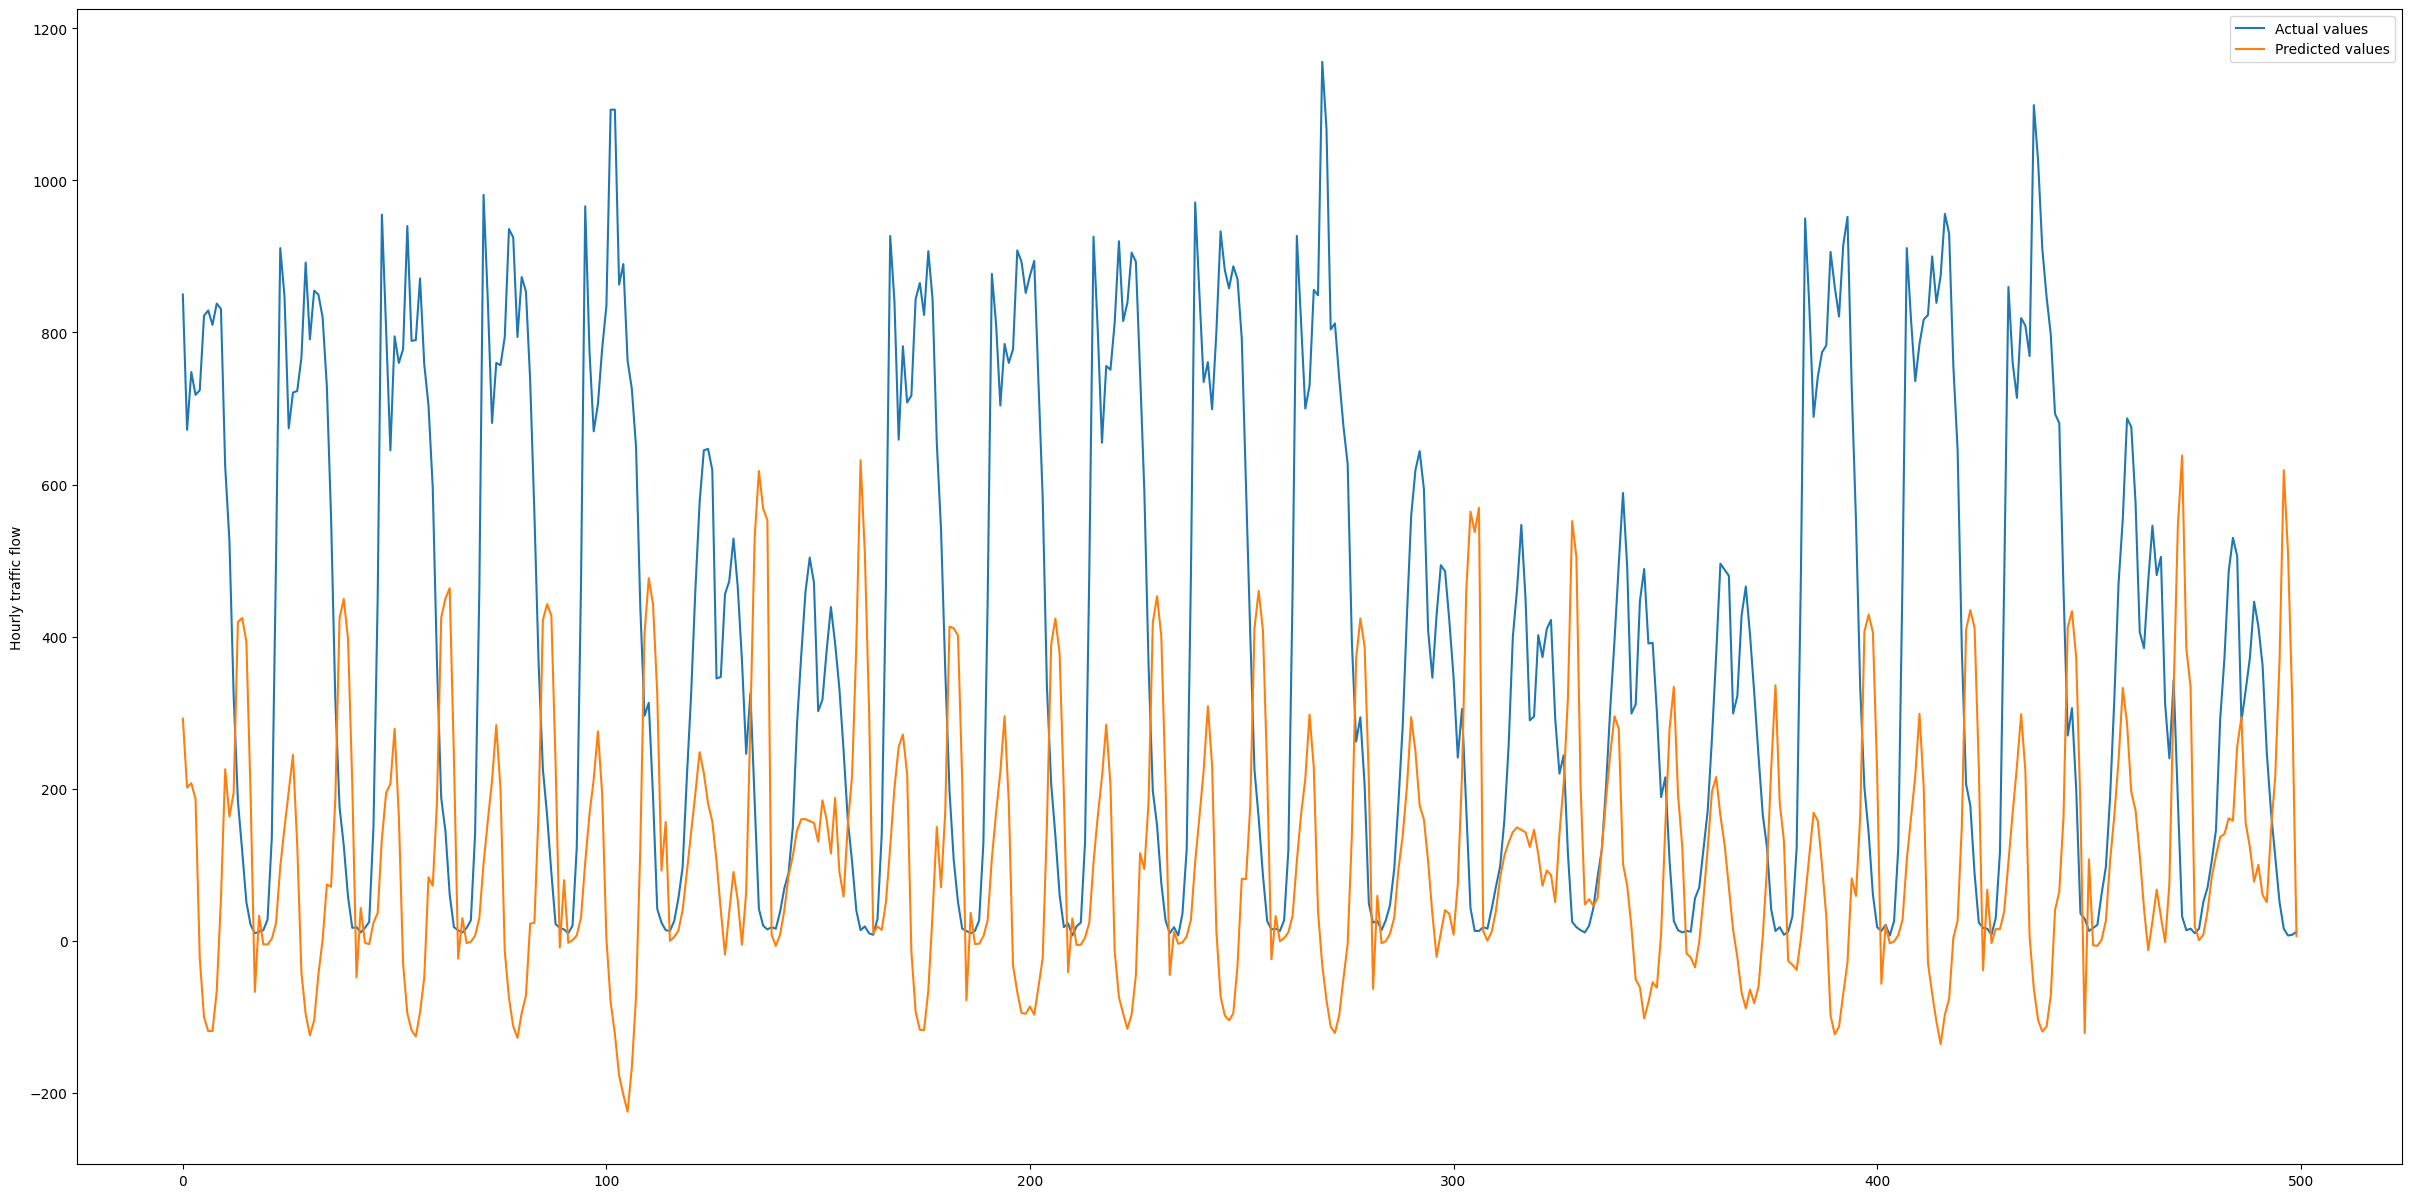

In [27]:
plt.figure(figsize=(30, 15))
plt.plot(y1, label = "Actual values")
plt.plot(x1, label = "Predicted values")
plt.legend()
plt.ylabel('Hourly traffic flow')
plt.show()